Connected to Python 3.11.9

C:\Users\kohli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 102s 98ms/step - accuracy: 0.8706 - loss: 0.4274 - val_accuracy: 0.9842 - val_loss: 0.0485
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 110s 117ms/step - accuracy: 0.9826 - loss: 0.0547 - val_accuracy: 0.9860 - val_loss: 0.0408
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.9883 - loss: 0.0378 - val_accuracy: 0.9884 - val_loss: 0.0329
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 109s 117ms/step - accuracy: 0.9915 - loss: 0.0256 - val_accuracy: 0.9896 - val_loss: 0.0306
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 182s 194ms/step - accuracy: 0.9936 - loss: 0.0210 - val_accuracy: 0.9918 - val_loss: 0.0256
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9888 - loss: 0.0344
Test Accuracy: 99.18%
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step


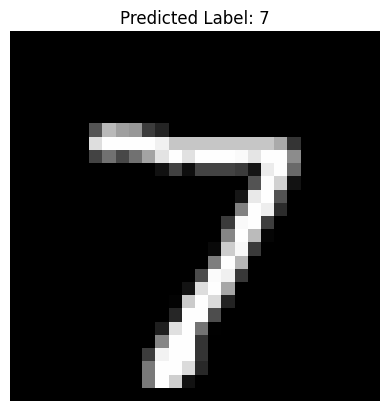

In [1]:
import numpy as np
import tensorflow as tf
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
from keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical # type: ignore
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocessing: Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape images to (28,28,1) since they are grayscale
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN Model
model = models.Sequential([
    # First Conv Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Conv Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Conv Layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output Layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
EPOCHS = 5
BATCH_SIZE = 64
history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_images, test_labels), verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Make predictions on test images
predictions = model.predict(test_images)

# Display the first test image with the predicted label
plt.imshow(test_images[0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
plt.axis('off')
plt.show()